In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Part2

/content/drive/MyDrive/Colab Notebooks/Part2
time: 5.47 ms


In [ ]:
import nltk
nltk.download('popular')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
import sklearn
import pandas as pd

time: 10.1 ms


In [ ]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.78 s


In [ ]:
df = pd.read_csv("data.csv", sep = "\t")
#!pwd
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


time: 9.78 s


In [ ]:
df_train['column'] = df_train['title'] + df_train['abstract']
df_test['column'] = df_test['title'] + df_test['abstract']

time: 200 ms


Exploratory Data Analysis

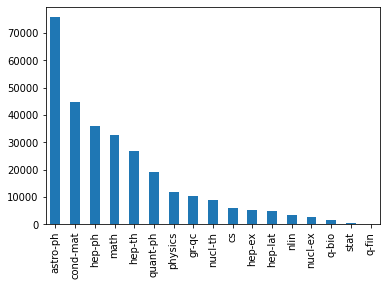

time: 339 ms


In [ ]:
# Number of different categories
df['general_category'].value_counts()[:17].plot.bar()

Data Preprocessing

In [ ]:
def data_cleaning(review):
  review = re.sub('[^a-zA-Z]', ' ', review) # replace special character with space
  review = str(review).lower() # change all character to lower case
  review = word_tokenize(review) # word tokenization
  review = [word for word in review if len(word) > 2] # only keep word that had length longer than 2
  review = ' '.join(review) # join the list of strings

  return review

time: 5.19 ms


In [ ]:
import re

df_train['clean_abstract'] = df_train['column'].apply(data_cleaning)
df_test['clean_abstract'] = df_test['column'].apply(data_cleaning)

time: 3min 21s


In [ ]:
!pip install transformers
import torch
from transformers import *

time: 2.7 s


In [ ]:
# use sciBert pre-trained model
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased', output_hidden_states=True)

time: 3.63 s


In [ ]:
# Set training and testing numbers
train_sampleSize = 1000
test_sampleSize = 200

# Set X: abstract
train_clean = df_train['clean_abstract'].head(train_sampleSize)
test_clean = df_test['clean_abstract'].head(test_sampleSize)

train = train_clean.to_list()
test = test_clean.to_list()

# Set y: categories
y_train = df_train["general_category"].head(train_sampleSize).values
y_test = df_test["general_category"].head(test_sampleSize).values

#y_train = df_train["categories"].head(train_sampleSize).values
#y_test = df_test["categories"].head(test_sampleSize).values

time: 339 ms


RUN BEFORE HERE

In [ ]:
X_train = []
for i in range(len(train)):
  ids = tokenizer.encode(train[i])

  # Convert the list of IDs to a tensor of IDs 
  ids = torch.LongTensor(ids)

  # unsqueeze IDs to get batch size of 1 as added dimension
  ids = ids.unsqueeze(0)

  with torch.no_grad():
      out = model(input_ids=ids)

  # the output is a tuple
  # the tuple contains three elements as explained above)
  # we only want the hidden_states
  hidden_states = out[2]

  sentence_embedding = torch.mean(hidden_states[-1], dim=1).squeeze()

  # convert to numpy
  np_tensor_temp = sentence_embedding.numpy()
  X_train.append(np_tensor_temp)

time: 8min 4s


In [ ]:
X_test = []
for i in range(len(test)):
  ids = tokenizer.encode(test[i])

  # Convert the list of IDs to a tensor of IDs 
  ids = torch.LongTensor(ids)

  # unsqueeze IDs to get batch size of 1 as added dimension
  ids = ids.unsqueeze(0)

  with torch.no_grad():
      out = model(input_ids=ids)

  # the output is a tuple
  # the tuple contains three elements as explained above)
  # we only want the hidden_states
  hidden_states = out[2]

  sentence_embedding = torch.mean(hidden_states[-1], dim=1).squeeze()

  # convert to numpy
  np_tensor_temp = sentence_embedding.numpy()
  X_test.append(np_tensor_temp)

time: 1min 33s


In [ ]:

from numpy import savetxt

savetxt('numpy_X_train(1000).csv', X_train, delimiter=',')
savetxt('numpy_X_test(200).csv', X_test, delimiter=',')


time: 1.05 s


In [ ]:
'''
import csv

def read_csv(filename):
    with open(filename, newline='') as f_input:
        return [list(map(float, row)) for row in csv.reader(f_input)]

X_train = read_csv('numpy_X_train(10000).csv')
X_test = read_csv('numpy_X_test(2500).csv')
'''

"\nimport csv\n\ndef read_csv(filename):\n    with open(filename, newline='') as f_input:\n        return [list(map(float, row)) for row in csv.reader(f_input)]\n\nX_train = read_csv('numpy_X_train(10000).csv')\nX_test = read_csv('numpy_X_test(2500).csv')\n"

time: 6.37 ms


In [ ]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score)
                             
print('SVC model fitting......')
clf_SVC = SVC()
clf_SVC.fit(X_train, y_train)
print("SVC: " + str(accuracy_score(y_test, clf_SVC.predict(X_test))))

SVC model fitting......
SVC: 0.75
time: 1.36 s


In [ ]:
print('SVC Classification Report:\n\n',classification_report(y_test, clf_SVC.predict(X_test)))

SVC Classification Report:

               precision    recall  f1-score   support

    astro-ph       0.87      0.97      0.92        40
    cond-mat       0.56      1.00      0.71        25
          cs       1.00      0.60      0.75         5
       gr-qc       0.50      0.12      0.20         8
      hep-ex       0.00      0.00      0.00         2
     hep-lat       0.00      0.00      0.00         4
      hep-ph       0.75      0.86      0.80        28
      hep-th       0.70      0.88      0.78        24
        math       0.83      0.96      0.89        25
        nlin       0.00      0.00      0.00         3
     nucl-ex       0.00      0.00      0.00         4
     nucl-th       1.00      0.20      0.33         5
     physics       0.50      0.10      0.17        10
       q-bio       0.00      0.00      0.00         2
    quant-ph       1.00      0.73      0.85        15

    accuracy                           0.75       200
   macro avg       0.51      0.43      0.43       2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('SVC Confusion Matrix:\n\n',confusion_matrix(y_test, clf_SVC.predict(X_test)))

SVC Confusion Matrix:

 [[39  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  4  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  2  1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0 24  2  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0 21  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 24  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  2  0  0  0  0  0  1  0  0]
 [ 0  2  0  0  0  0  2  0  0  0  0  1  0  0  0]
 [ 3  5  0  0  0  0  0  1  0  0  0  0  1  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  1  0  0  0  0  0  0 11]]
time: 209 ms


In [ ]:
from sklearn.metrics import hamming_loss

print('SVC Hamming Loss: ', hamming_loss(y_test, clf_SVC.predict(X_test)))

SVC Hamming Loss:  0.25
time: 190 ms


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print('KNN model fitting......')
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
print("KNN: " + str(accuracy_score(y_test, clf_KNN.predict(X_test))))

KNN model fitting......
KNN: 0.705
time: 552 ms


In [ ]:
print('KNN Classification Report:\n\n',classification_report(y_test, clf_KNN.predict(X_test)))
print('\n\nKNN Confusion Matrix:\n\n',confusion_matrix(y_test, clf_KNN.predict(X_test)))
print('\n\nKNN Hamming Loss: ', hamming_loss(y_test, clf_KNN.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Classification Report:

               precision    recall  f1-score   support

    astro-ph       0.71      0.97      0.82        40
    cond-mat       0.53      0.96      0.69        25
          cs       1.00      0.60      0.75         5
       gr-qc       0.67      0.25      0.36         8
      hep-ex       0.00      0.00      0.00         2
     hep-lat       0.25      0.25      0.25         4
      hep-ph       0.76      0.79      0.77        28
      hep-th       0.73      0.79      0.76        24
        math       0.92      0.92      0.92        25
        nlin       0.00      0.00      0.00         3
     nucl-ex       0.00      0.00      0.00         4
     nucl-th       0.00      0.00      0.00         5
     physics       0.50      0.10      0.17        10
       q-bio       0.00      0.00      0.00         2
    quant-ph       0.88      0.47      0.61        15

    accuracy                           0.70       200
   macro avg       0.46      0.41      0.41       2

In [ ]:
from sklearn.linear_model import LogisticRegression

print('Logistic Regression model fitting......')
clf_LR = LogisticRegression(max_iter=5000)
clf_LR.fit(X_train, y_train)
print("Logistic Regression: " + str(accuracy_score(y_test, clf_LR.predict(X_test))))

Logistic Regression model fitting......
Logistic Regression: 0.745
time: 5 s


In [ ]:
print('Logistic Regression Classification Report:\n\n',classification_report(y_test, clf_LR.predict(X_test)))
print('\nLogistic Regression Confusion Matrix:\n\n',confusion_matrix(y_test, clf_LR.predict(X_test)))
print('\nLogistic Regression Hamming Loss: ', hamming_loss(y_test, clf_LR.predict(X_test)))

Logistic Regression Classification Report:

               precision    recall  f1-score   support

    astro-ph       0.87      0.97      0.92        40
    cond-mat       0.59      0.88      0.71        25
          cs       1.00      1.00      1.00         5
       gr-qc       0.50      0.25      0.33         8
      hep-ex       0.67      1.00      0.80         2
     hep-lat       0.50      0.25      0.33         4
      hep-ph       0.76      0.79      0.77        28
      hep-th       0.67      0.67      0.67        24
        math       0.88      0.92      0.90        25
        nlin       0.50      0.33      0.40         3
     nucl-ex       0.00      0.00      0.00         4
     nucl-th       0.67      0.40      0.50         5
     physics       0.60      0.30      0.40        10
       q-bio       0.00      0.00      0.00         2
    quant-ph       0.73      0.73      0.73        15

    accuracy                           0.74       200
   macro avg       0.60      0.57  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TSNE PLOT

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

In [ ]:
stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

def get_tf(data, max_df=1.0, min_df=1, ngram_range=(1,1)):
    m = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    d = m.fit_transform(data)
    return m, d

tfidf_m, tfidf_d = get_tf(df_train['clean_abstract'].head(10000), max_df=0.90, min_df=10)
n_topics = 17

def get_kmeans(data, k):
    m = KMeans(n_clusters=k).fit(data)
    d = m.predict(data)
    return m, d     

kmean_m, kmean_d = get_kmeans(tfidf_d, n_topics)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


time: 4min 50s


In [ ]:
def show_topics(model, feature_names, n_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_words - 1:-1]]))
    print()
    
def show_cluster_topics(cluster_labels, tf_matrix, feature_names, n_words):
    d = pd.DataFrame(tf_matrix.toarray())
    d['c'] = cluster_labels
    d = d.groupby('c').sum().T
    
    for col in d:
        top_n = d[col].nlargest(n_words).index.tolist()
        print("Cluster #%d:" % col)
        print(", ".join([feature_names[i]
                for i in top_n]))
    print()

time: 12.8 ms


In [ ]:
print("Top 15 stemmed words per cluster in Kmeans model\n")
show_cluster_topics(kmean_d, tfidf_d, tfidf_m.get_feature_names(), 15)

Top 15 stemmed words per cluster in Kmeans model

Cluster #0:
quark, qcd, heavi, mass, meson, chiral, gluon, baryon, hadron, model, lattic, decay, flavor, nucleon, sum
Cluster #1:
galaxi, redshift, format, star, mass, gas, luminos, survey, disk, observ, halo, sampl, stellar, metal, evolut
Cluster #2:
theori, gaug, field, action, space, model, non, symmetri, fermion, coupl, dimens, loop, invari, supersymmetr, dimension
Cluster #3:
line, radio, emiss, jet, observ, sourc, galaxi, quasar, absorpt, ray, high, region, gas, optic, detect
Cluster #4:
algebra, group, space, graph, prove, theorem, function, set, manifold, general, paper, finit, number, polynomi, construct
Cluster #5:
string, brane, theori, field, solut, background, dualiti, gaug, non, supersymmetr, dimension, ad, type, model, supergrav
Cluster #6:
cluster, galaxi, mass, globular, star, ngc, redshift, observ, model, ray, popul, lens, format, luminos, distribut
Cluster #7:
neutrino, mass, oscil, mix, solar, lepton, model, experi, 

In [ ]:
def get_svd(data, components):
    svd = TruncatedSVD(n_components=components).fit(data)
    o = pd.DataFrame(svd.transform(data), columns=range(0,components))
    return svd,o

def get_tsne(data, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    o = pd.DataFrame(tsne.fit_transform(data), columns=range(0,components))
    return tsne,o

svd_v, svd_m = get_svd(tfidf_d, 50)
tnse_v, tsne_m = get_tsne(svd_m, 2, 25)

time: 1min 47s


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

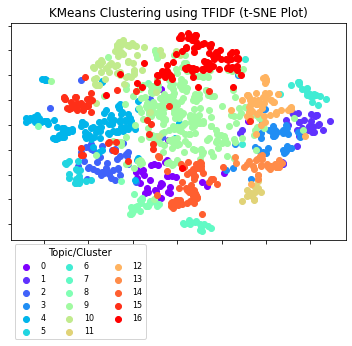

time: 424 ms


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

def plot_scatter_2d(x, y, c, sample_size, title):
    df = pd.DataFrame({'x': x, 'y': y, 'c': c}).sample(sample_size)
    l = len(np.unique(c))
    
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
                                   
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.show()

plot_scatter_2d(tsne_m[0], tsne_m[1], kmean_d, 1000, 'KMeans Clustering using TFIDF (t-SNE Plot)')

In [ ]:
# baseline TFIDF
tfidf_V = TfidfVectorizer()
X_train_f = tfidf_V.fit_transform(train_clean)
X_test_f = tfidf_V.transform(test_clean)

time: 827 ms


In [ ]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score)
                             
print('SVC model fitting......')
clf_SVC = SVC()
clf_SVC.fit(X_train_f, y_train)
print("SVC: " + str(accuracy_score(y_test, clf_SVC.predict(X_test_f))))

print('\nSVC Classification Report:\n\n',classification_report(y_test, clf_SVC.predict(X_test_f)))

from sklearn.metrics import hamming_loss

print('\nSVC Hamming Loss: ', hamming_loss(y_test, clf_SVC.predict(X_test_f)))

SVC model fitting......
SVC: 0.8096


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVC Classification Report:

               precision    recall  f1-score   support

    astro-ph       0.92      0.97      0.94       633
    cond-mat       0.71      0.95      0.81       357
          cs       1.00      0.25      0.39        53
       gr-qc       0.79      0.48      0.60        99
      hep-ex       0.94      0.35      0.51        49
     hep-lat       0.96      0.56      0.71        48
      hep-ph       0.78      0.89      0.83       318
      hep-th       0.80      0.84      0.82       244
        math       0.77      0.98      0.86       297
        nlin       0.00      0.00      0.00        29
     nucl-ex       1.00      0.06      0.12        16
     nucl-th       0.83      0.50      0.62        68
     physics       0.59      0.20      0.30       108
       q-bio       0.00      0.00      0.00         8
       q-fin       0.00      0.00      0.00         2
    quant-ph       0.84      0.79      0.82       165
        stat       0.00      0.00      0.00        

In [ ]:
print('SVC Confusion Matrix:\n\n',confusion_matrix(y_test, clf_SVC.predict(X_test_f)))

SVC Confusion Matrix:

 [[613   7   0   4   0   0   4   0   3   0   0   0   2   0   0   0   0]
 [  3 340   0   0   0   0   1   0   2   0   0   0   3   0   0   8   0]
 [  5   6  13   0   0   0   0   0  28   0   0   0   0   0   0   1   0]
 [ 16   3   0  48   0   0   2  17   8   0   0   0   3   0   0   2   0]
 [  4   0   0   0  17   0  24   1   0   0   0   0   3   0   0   0   0]
 [  1   6   0   0   0  27   4   4   4   0   0   1   0   0   0   1   0]
 [  7   3   0   0   0   0 284  15   3   0   0   4   0   0   0   2   0]
 [  1  10   0   6   0   0  11 205   9   0   0   0   0   0   0   2   0]
 [  1   4   0   0   0   0   0   1 290   0   0   0   1   0   0   0   0]
 [  1  18   0   0   0   0   0   3   7   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   9   0   0   0   1   2   0   0   0   0   0]
 [  1   9   0   0   0   1  21   2   0   0   0  34   0   0   0   0   0]
 [ 11  49   0   3   1   0   5   1   8   0   0   0  22   0   0   8   0]
 [  2   5   0   0   0   0   0   0   1   0   0   0   0

In [ ]:
def topFeature(text, category, n):
  ''' Return the top features given a category'''
  vectorizer = TfidfVectorizer()
  df = text.head(10000)
  df = df.loc[df['general_category'] == category]
  X = vectorizer.fit_transform(df['clean_abstract'])
  return X.toarray().min()

time: 3.44 ms


In [ ]:
topFeature(df_train, 'astro-ph', 20)

0.0

time: 312 ms
